# **Exploratory data analysis**

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the dataset
data= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Blockstak_Assessment/ML Assessment Dataset (Bank Data).csv")

# checking shape of dataset
print("shape of the data:", data.shape)
data.head()

shape of the data: (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# checking data types of all columns
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
#checking missing data
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# target class count
data["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
# percentage of class present in target variable(y)
print("percentage of NO and YES\n",data["y"].value_counts()/len(data)*100)

percentage of NO and YES
 no     88.476001
yes    11.523999
Name: y, dtype: float64


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


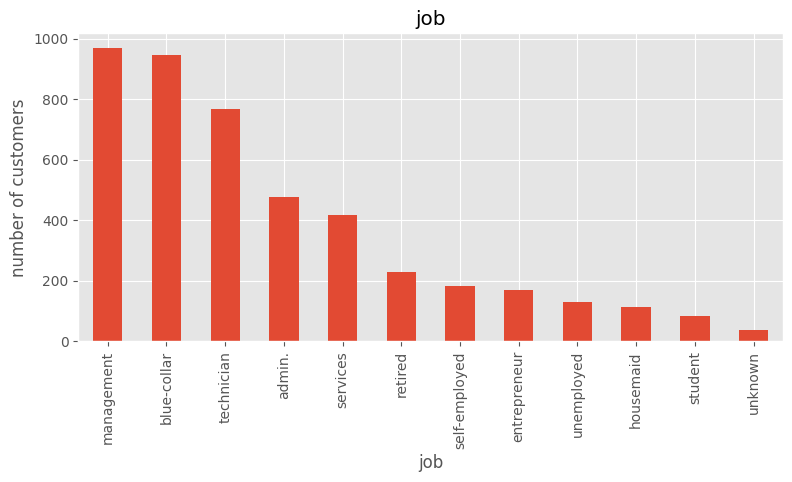

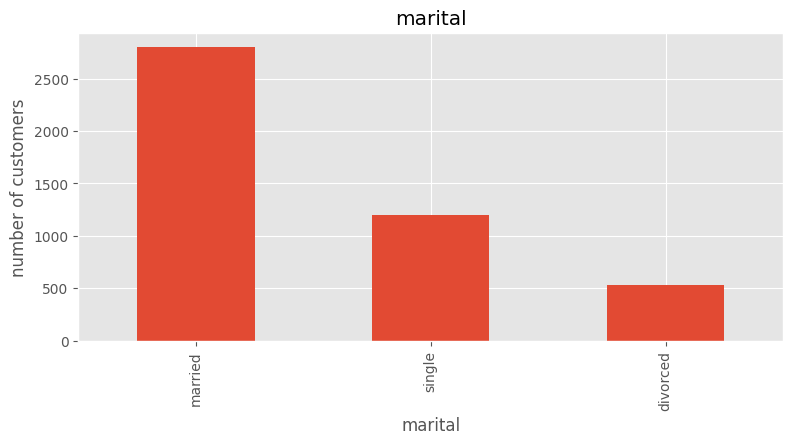

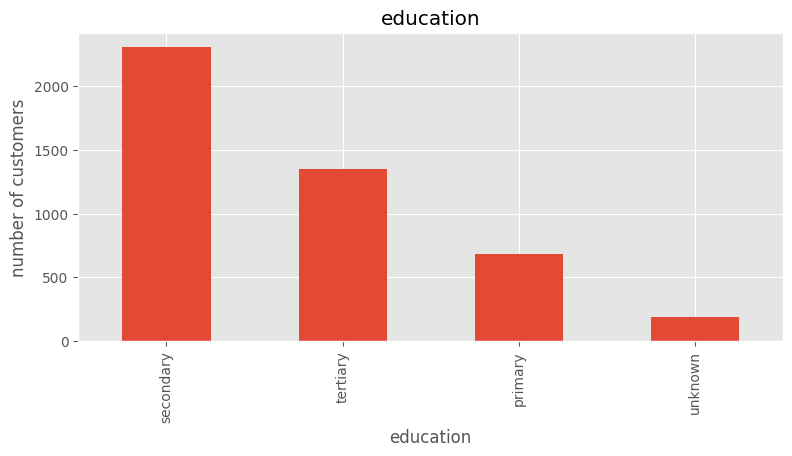

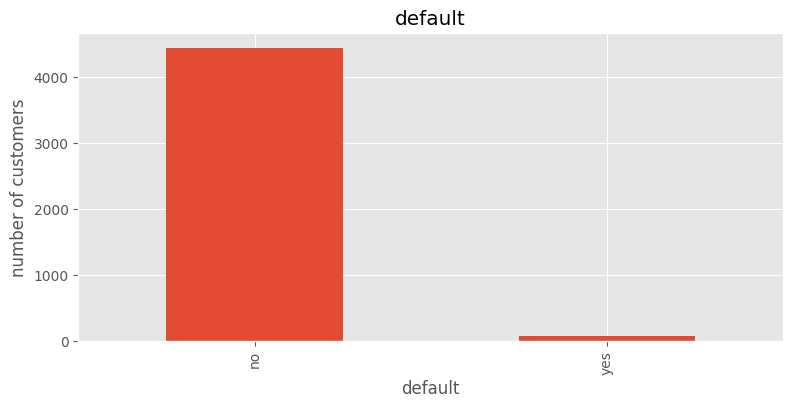

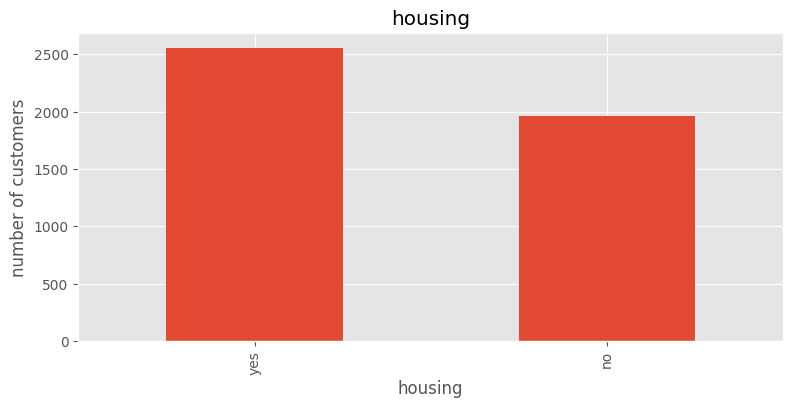

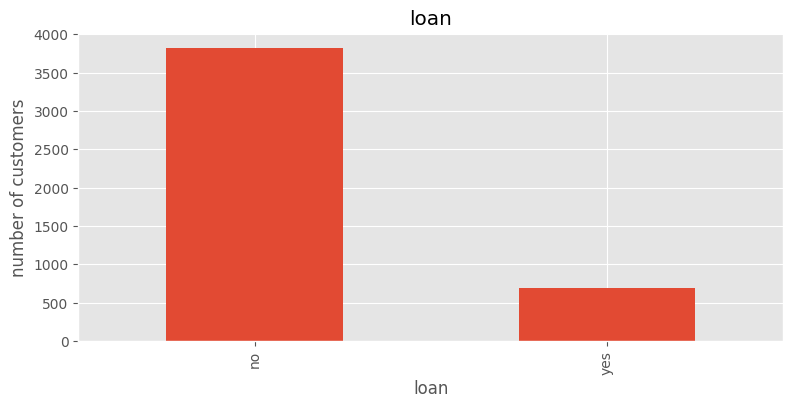

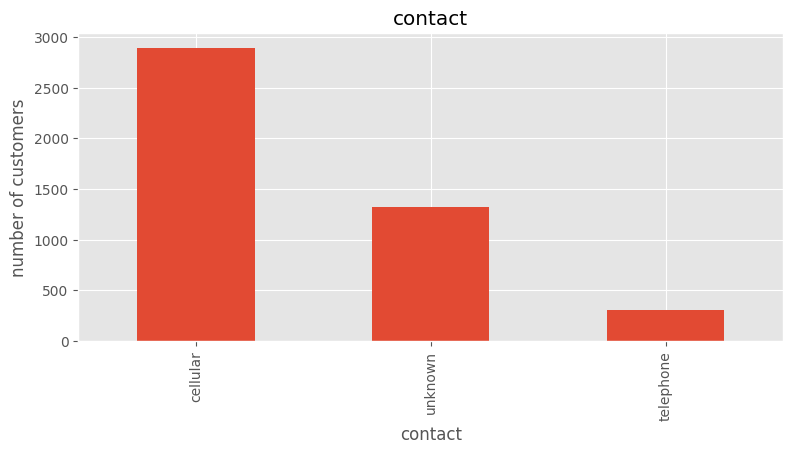

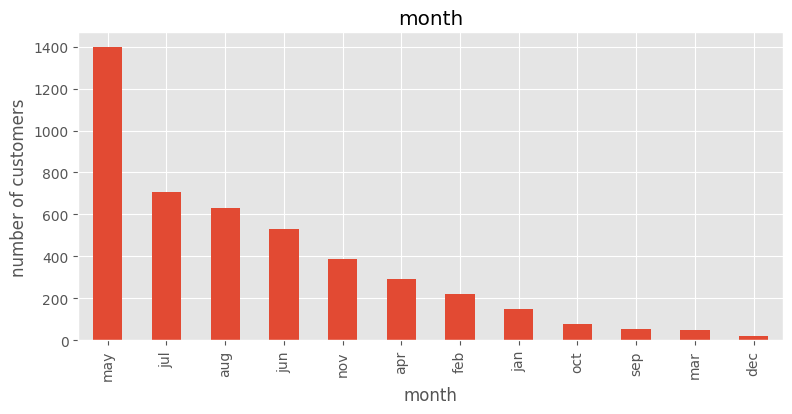

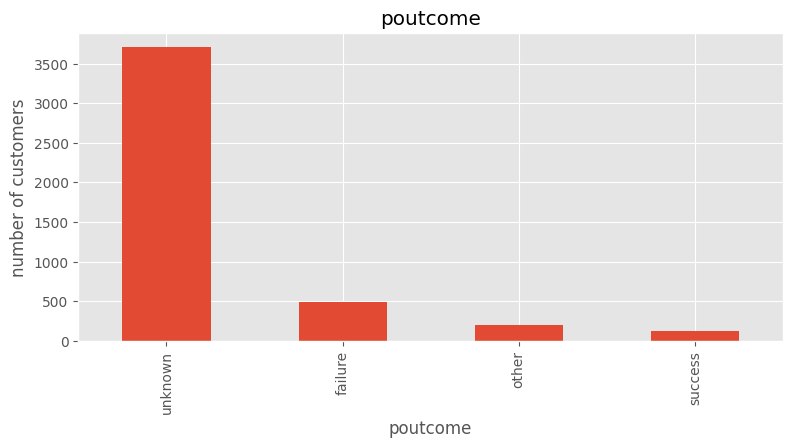

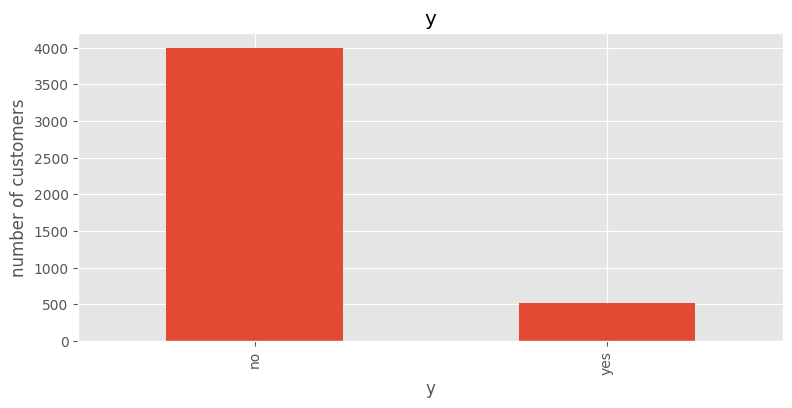

In [ ]:
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

# plotting bar chart for each categorical variable
plt.style.use("ggplot")

for column in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

### **Observations from categorical variables:**

From the above visuals, we can make the following observations:

The top three professions that our customers belong to are - management, blue-collar jobs and technicians.
A huge number of the customers are married.
Majority of the customers do not have a credit in default.
Many of our past customers have applied for a housing loan but very few have applied for personal loans.
Cell-phones seem to be the most favoured method of reaching out to customers.
Many customers have been contacted in the month of May.
The plot for the target variable shows heavy imbalance in the target variable.
The missing values in some columns have been represented as unknown. unknown represents missing data. In the next task, we will treat these values.

In [ ]:
# replacing "unknown" with the mode
for column in cat_var:
    mode= data[column].mode()[0]
    data[column]= data[column].replace("unknown", mode)

In [ ]:
# indentifying the numerical variables
num_var= data.select_dtypes(include=np.number)
num_var.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


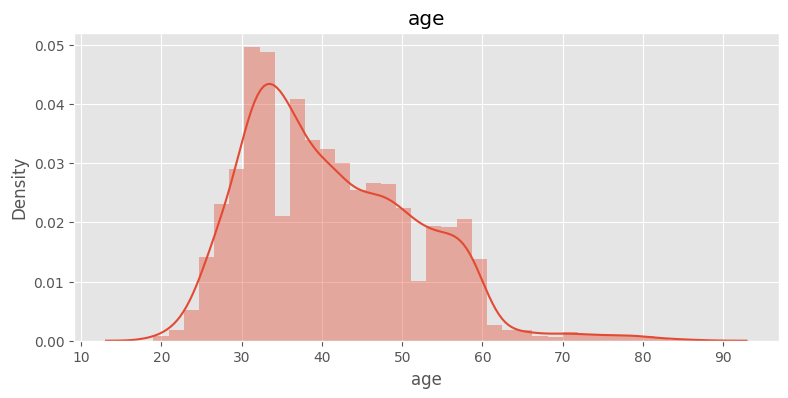

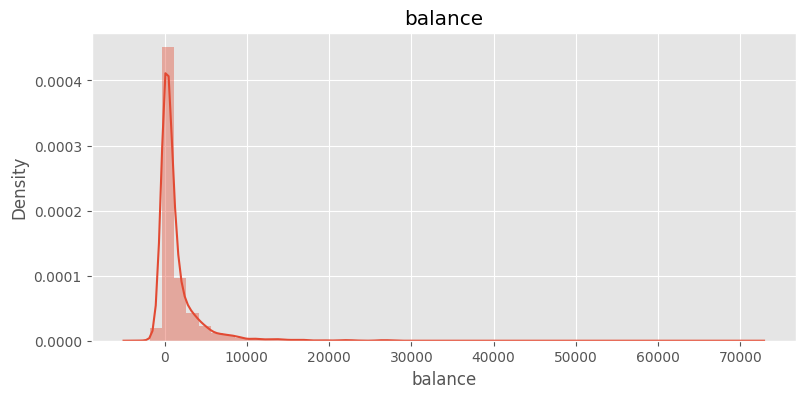

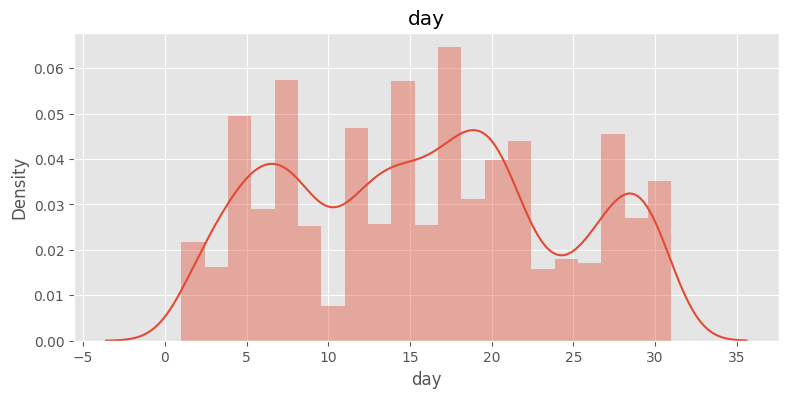

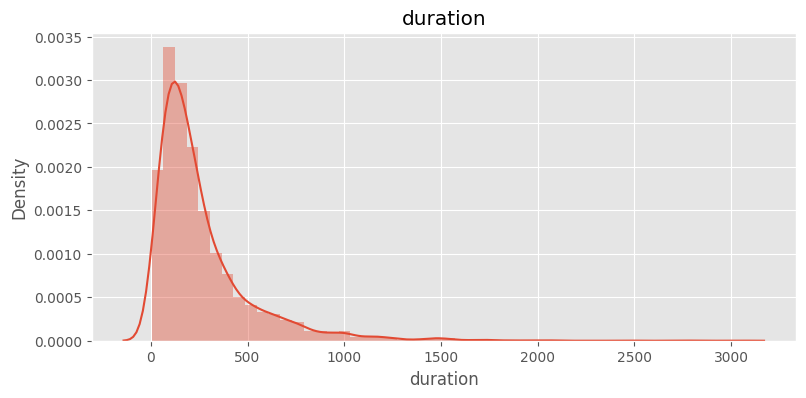

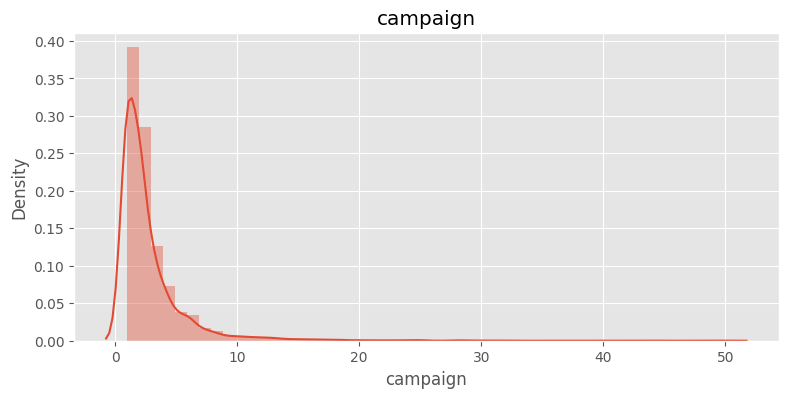

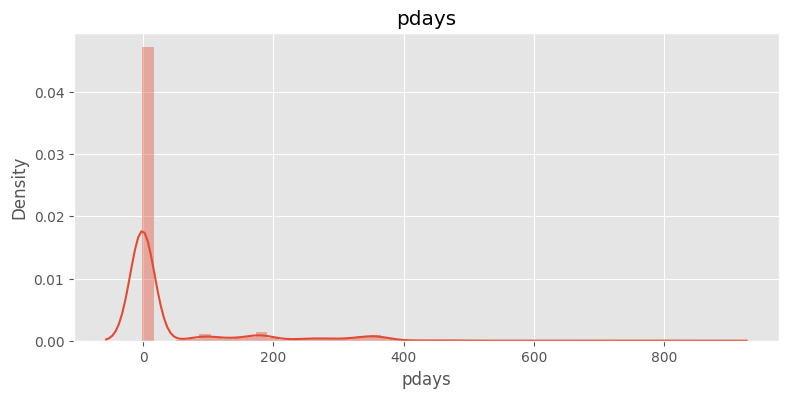

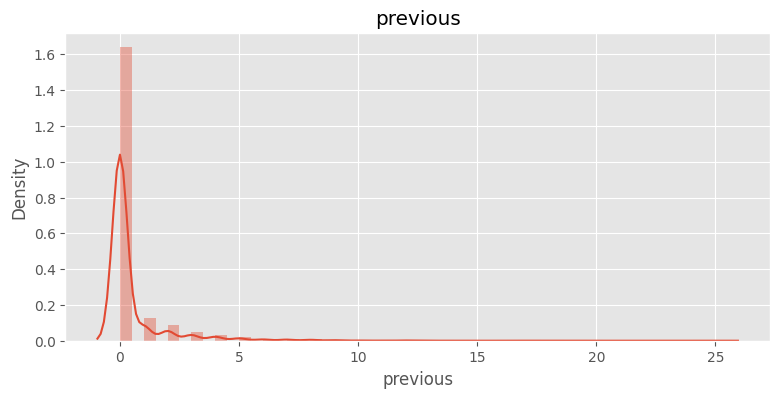

In [ ]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(data[column], kde=True)
    plt.title(column)

### **Observations from numerical variables:**

From the above visuals, we can make the following observations:

As we can see from the histogram, the features age, balance, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
Since the features pdays and previous consist majorly of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [ ]:
# data almost consist to constant state
data.drop(columns=["pdays", "previous"], axis=1, inplace=True)

In [ ]:
# data describing
data.describe()

,age,balance,day,duration,campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.123203,973.150409,15.915284,241.749171,2.412962
std,10.416974,1241.081851,8.247667,185.313747,1.622028
min,19.000000,-3313.000000,1.000000,4.000000,1.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000
max,73.000000,3596.000000,31.000000,666.000000,6.000000


In [ ]:
# computation of interquantile range to calculate the boundaries
lower_boundries= []
upper_boundries= []
for i in ["age", "balance", "day", "duration", "campaign"]:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound= data[i].quantile(0.25) - (1.5*IQR)
    upper_bound= data[i].quantile(0.75) + (1.5*IQR)

    print(i, ":", lower_bound, ",",  upper_bound)

    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.0 , 73.0
balance : -2047.5 , 3596.5
day : -9.0 , 39.0
duration : -233.5 , 666.5
campaign : -2.0 , 6.0


In [ ]:
# lower boundaries of numerical variables
lower_boundries

[9.0, -2047.5, -9.0, -233.5, -2.0]

In [ ]:
# upper boundaries of numerical variables
upper_boundries

[73.0, 3596.5, 39.0, 666.5, 6.0]

In [ ]:
# replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for i in ["age", "balance", "day", "duration", "campaign"]:
    data.loc[data[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1

In [ ]:
# data describing without outliers
data.describe()

,age,balance,day,duration,campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.123203,973.150409,15.915284,241.749171,2.412962
std,10.416974,1241.081851,8.247667,185.313747,1.622028
min,19.000000,-3313.000000,1.000000,4.000000,1.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000
max,73.000000,3596.000000,31.000000,666.000000,6.000000


# **Predictive modeling**

**(i) Decision tree**

In [ ]:
# checking categorical class
for i in cat_var:
    print(i, ":", data[i].unique())

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']
marital : ['married' 'single' 'divorced']
education : ['primary' 'secondary' 'tertiary']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome : ['unknown' 'failure' 'other' 'success']
y : ['no' 'yes']


In [ ]:
# importing necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from joblib import dump, load
from sklearn.naive_bayes import GaussianNB

In [ ]:
# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [ ]:
# label encoded dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,3,0
1,33,7,1,1,0,3596,1,1,0,11,8,220,1,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,0,0
3,30,4,1,2,0,1476,1,1,0,3,6,199,4,3,0
4,59,1,1,1,0,0,1,0,0,5,8,226,1,3,0


In [ ]:
# feature variables
x= data.iloc[:, :-1]

# target variable
y= data.iloc[:, -1]

<Axes: >

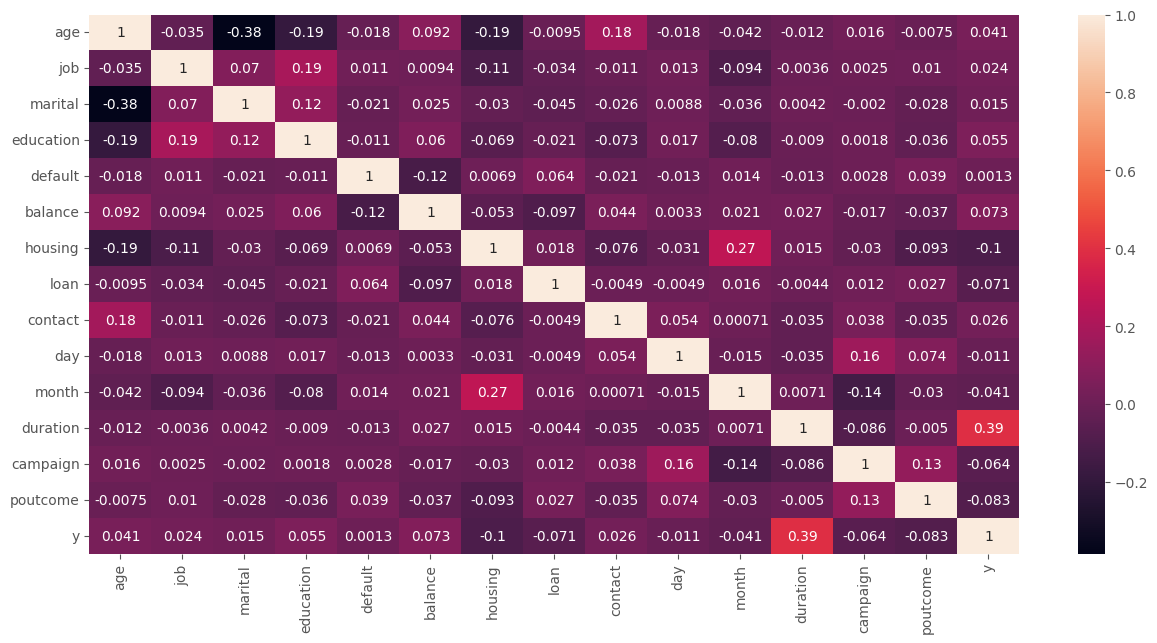

In [ ]:
# data correlation plot
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# decision tree algorithm fitting
dcs_clf = DecisionTreeClassifier()

dcs_clf_param = {
           "max_features": [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
           "max_depth":  [None, 2, 4, 6, 8, 10],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'],
           "splitter": ['best', 'random']
          }

cv_dcs_clf = StratifiedKFold(n_splits=5)

decised_rf =  GridSearchCV(dcs_clf, dcs_clf_param, cv=cv_dcs_clf, scoring= "f1_macro", n_jobs=-1, verbose=2)

decised_rf.fit(x_train, y_train)
dump(decised_rf, '/content/drive/MyDrive/Colab_Notebooks/Blockstak_Assessment/Decision_classifier_bank_model.joblib')

print("best score is:", decised_rf.best_score_)
print("best parameters are:", decised_rf.best_params_)

Fitting 5 folds for each of 2688 candidates, totalling 13440 fits
best score is: 0.7002658360075258
best parameters are: {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}


[[776  31]
 [ 65  33]]
0.8939226519337017
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       807
           1       0.52      0.34      0.41        98

    accuracy                           0.89       905
   macro avg       0.72      0.65      0.67       905
weighted avg       0.88      0.89      0.88       905



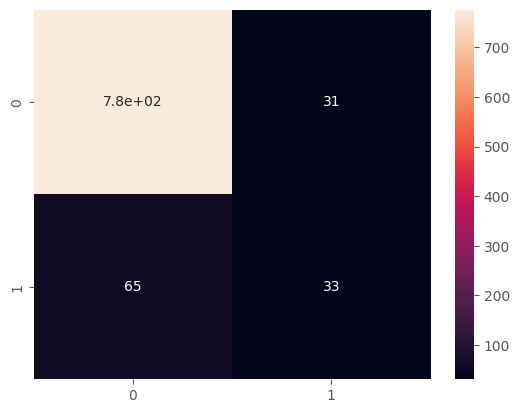

In [ ]:
# checking model performance
y_predicted_decised_clf= decised_rf.predict(x_test)

print(confusion_matrix(y_test, y_predicted_decised_clf))
sns.heatmap(confusion_matrix(y_test, y_predicted_decised_clf), annot=True)
print(accuracy_score(y_test, y_predicted_decised_clf))
print(classification_report(y_test, y_predicted_decised_clf))

**(ii) Naive Bayes**

[[750  57]
 [ 61  37]]
0.8696132596685083
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       807
           1       0.39      0.38      0.39        98

    accuracy                           0.87       905
   macro avg       0.66      0.65      0.66       905
weighted avg       0.87      0.87      0.87       905



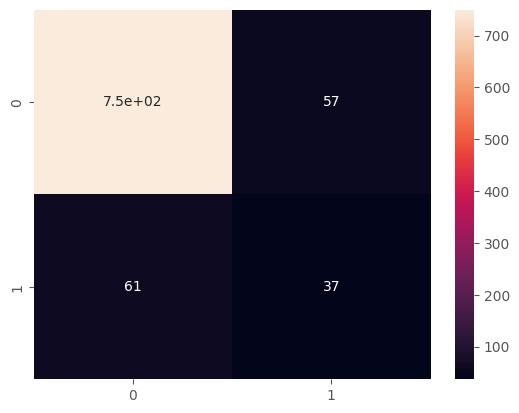

In [ ]:
# naive bayes algorithm fitting
nb = GaussianNB()

#Training the model
nb.fit(x_train, y_train)
dump(nb, '/content/drive/MyDrive/Colab_Notebooks/Blockstak_Assessment/Naive_Bayes_classifier_bank_model.joblib')

#Predict testing set
y_pred = nb.predict(x_test)

#Check performance of model
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **Conclusions and Recommendations:**

Between two classifiers, Decision classifier performed slightly better in prediction. The predictive analytics clearly indicates that, middle aged(30-40y), married, solvent customers are more active and may be recommended for long term deposit to enhance telemarketing
strategy of company.